# Project 1: Code
## Authors: Aashi Aashi, Ryan Lee, Amanda Nguyen, Samarth Mishra

### Problem Description

Marketing budgets now comprise 11 percent of total company budgets, based on a CMO survey 
sponsored by the Fuqua School of Business at Duke University, Deloitte LLP, and the American 
Marketing Association. However, the effectiveness of marketing varies significantly: on the one hand, 
P&G cut more than $100 million in digital marketing spending because their digital ads were largely 
ineffective; on the other hand, Netflix plans a 54% boost in ad spending because they got very positive 
feedback in international markets. 
 
One potential reason for such variation is the way of making marketing budget allocations. Namely, how 
much to invest in each advertisement platform. As stated in the Handbook of Marketing Analytics: 
 
...budget decisions are often based on gut feelings or on the negotiation skills of individual 
managers. Consequently, politics and individual opinions tend to shape the decision process 
instead of fact-based discussions. Obviously, these rules and practices bear the risk of results far 
away from the optimal, profit-maximizing budget. 
 
Indeed, the marketing strategy of Netflix seems to be steered by data.  
 
In this project, we use linear programming to build a simple marketing budget allocation strategy. 

### Specifics

#### 1)
Assume that your company is deciding how to spend a marketing budget of $10M. You work in the marketing department as a data scientist and the chief marketing officer has asked you write a report recommending how to spread this budget among several marketing mediums. Your department has employed an outside consulting firm to estimate the return on investment 
(ROI) of each marketing medium under consideration. The results are in the table below, and also in a CSV attached to this assignment: 

In [257]:
%matplotlib inline

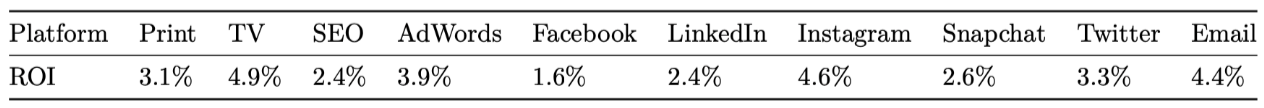

# Reading CSV file

In [258]:
import pandas as pd
import numpy as np

ROI_data = pd.read_csv("ROI_data.csv")
platforms_names = ROI_data.columns.tolist()[1:]
ROI_data

,Platform,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
0,ROI,0.031,0.049,0.024,0.039,0.016,0.024,0.046,0.026,0.033,0.044
1,Second Firms ROI Estimate,0.049,0.023,0.024,0.039,0.044,0.046,0.026,0.019,0.037,0.026


#### 2) 
On top of these ROIs, your boss has decided to constrain your budget as follows: 

a) The amount invested in print and TV should be no more than the amount spent on 
Facebook and Email. Surprisingly, email seems to be a great channel for reaching real 
people. 

b) The total amount used in social media (Facebook, LinkedIn, Instagram, Snapchat, and Twitter) should be at least twice of SEO and AdWords. 

c) For each platform, the amount invested should be no more than $3M.

#### 3) 
Formulate the marketing budget allocation problem as a linear program.  Use gurobi to find the 
optimal budget allocation. 

#### Variable Definitions
print = Amount invested in Print <br>
tv = Amount invested in TV <br>
seo = Amount invested in SEO <br>
words = Amount invested in AdWords <br>
f_book = Amount invested in Facebook <br>
l_in = Amount invested in LinkedIn <br>
gram = Amount invested in Instagram <br>
snap = Amount invested in Snapchat <br>
twitter = Amount invested in Twitter <br>
email = Amount invested in Email <br>

#### Obj. Eq: 
0.031 x print + 0.049 x tv + 0.024 x seo + 0.039 x words + 0.016 x f_book + 0.024 x l_in + 0.046 x gram + 0.026 x snap + 0.033 x twitter + 0.044 x email<br>
<br>
print + tv + seo + words + f_book + l_in + gram + snap + twitter + email <= 10M <br>
print + tv <= f_book + email <br>
2seo + 2words <= f_book + l_in + gram + snap + twitter <br>
print <= 3M <br>
tv <= 3M <br>
seo <= 3M <br>
words <= 3M <br>
f_book <= 3M <br>
l_in <= 3M <br>
gram <= 3M <br>
snap <= 3M <br>
twitter <= 3M <br>
email <= 3M <br>

In [259]:
ROI = list(ROI_data.iloc[0])
obj= np.array(ROI[1:11]) # objective vector
obj[0:] += 1

A = np.zeros((13,10)) # initialize constraint matrix
A[0,:] = [1,1,1,1,1,1,1,1,1,1] 
A[1,:] = [1,1,0,0,-1,0,0,0,0,-1] 
A[2,:] = [0,0,2,2,-1,-1,-1,-1,-1,0]
A[3:13,:] = np.identity(10)
b = np.array([10,0,0,3,3,3,3,3,3,3,3,3,3]) # limits in M
sense = np.array(['<','<','<','<','<','<','<','<','<','<','<','<','<']) # all constraints are less than or equal constraints

In [260]:
print(obj)

[1.031 1.049 1.024 1.039 1.016 1.024 1.046 1.026 1.033 1.044]


In [261]:
print(A)

[[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  0.  0. -1.  0.  0.  0.  0. -1.]
 [ 0.  0.  2.  2. -1. -1. -1. -1. -1.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]


In [262]:
import gurobipy as gp

ROIModel = gp.Model() # initialize an empty model

ROIModX = ROIModel.addMVar(10) # tell the model how many variables there are
# must define the variables before adding constraints because variables go into the constraints
ROIModCon = ROIModel.addMConstrs(A, ROIModX, sense, b) # add the constraints to the model
ROIModel.setMObjective(None,obj,0,sense=gp.GRB.MAXIMIZE) # add the objective to the model...we'll talk about the None and the 0

ROIModel.Params.OutputFlag = 0 # tell gurobi to shut up!!
ROIModel.Params.TimeLimit = 3600

In [263]:
ROIModel.optimize() # solve the LP

In [264]:
ROIModel.objVal # optimal ROI in millions of dollars

10.456

In [265]:
ROIModX.x # how many millions of dollars to invest in platform

array([0., 3., 0., 1., 0., 0., 3., 0., 0., 3.])

In [292]:
budget_alloc=[]
for i in ROIModX.x:
    budget_alloc.append(i)
allocations_df = pd.DataFrame(zip(platforms_names,budget_alloc), columns=['Platform','Budget Allocation (in $M)'])
#allocations_df_updated=allocations_df.drop(labels=0,axis=0)
allocations_df

,Platform,Budget Allocation (in $M)
0,Print,0.0
1,TV,3.0
2,SEO,0.0
3,AdWords,1.0
4,Facebook,0.0
5,LinkedIn,0.0
6,Instagram,3.0
7,Snapchat,0.0
8,Twitter,0.0
9,Email,3.0


In [293]:
print('Objective Function Value: $' + str(round(ROIModel.objVal,2)) + "M")

Objective Function Value: $10.46M


<AxesSubplot:title={'center':'Budget Allocation via the first estimated ROI'}, xlabel='Platform'>

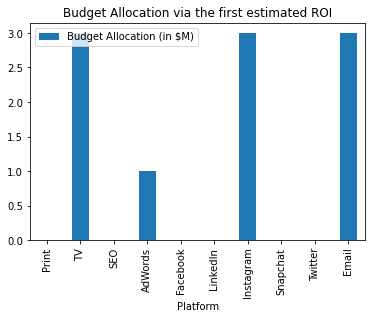

In [297]:
allocations_df.plot(kind='bar',x='Platform',title="Budget Allocation via the first estimated ROI")

#### 4) 
Your boss is happy to see the promising results presented by the marketing department. 
However, your boss is also very concerned because your boss recalls being somewhat 
disappointed after following such recommendations in the past. To be cautious about the 
decision, your team has decided to get another opinion about the ROI data and rerun the 
analysis.  The second consulting firm returns the estimates of the ROI data in the table below 
(also in the CSV file mentioned above).  You are asked to compare the two optimal allocations 
from these two ROI estimates.  

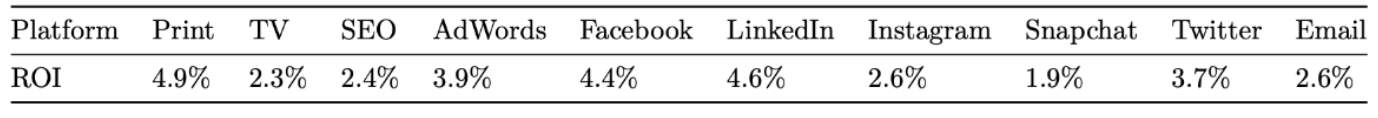

In [269]:
ROI_2_data = ROI_data.copy()

In [270]:
ROI_2 = list(ROI_2_data.iloc[1])
obj_2= np.array(ROI_2[1:11]) # objective vector
obj_2[0:] += 1

C = np.zeros((13,10)) # initialize constraint matrix
C[0,:] = [1,1,1,1,1,1,1,1,1,1] 
C[1,:] = [1,1,0,0,-1,0,0,0,0,-1] 
C[2,:] = [0,0,2,2,-1,-1,-1,-1,-1,0]
C[3:13,:] = np.identity(10)
d = np.array([10,0,0,3,3,3,3,3,3,3,3,3,3]) # limits in M
sense = np.array(['<','<','<','<','<','<','<','<','<','<','<','<','<']) # all constraints are less than or equal constraints

In [271]:
ROI_2Model = gp.Model() # initialize an empty model

ROI_2ModX = ROI_2Model.addMVar(10) # tell the model how many variables there are
# must define the variables before adding constraints because variables go into the constraints
ROI_2ModCon = ROI_2Model.addMConstrs(C, ROI_2ModX, sense, d) # add the constraints to the model
ROI_2Model.setMObjective(None,obj_2,0,sense=gp.GRB.MAXIMIZE) # add the objective to the model...we'll talk about the None and the 0

ROI_2Model.Params.OutputFlag = 0 # tell gurobi to shut up!!
ROI_2Model.Params.TimeLimit = 3600

In [272]:
ROI_2Model.optimize() # solve the LP

In [273]:
ROI_2Model.objVal # optimal ROI in millions of dollars

10.456

In [274]:
ROI_2ModX.x # how many millions of dollars to invest in platform

array([3., 0., 0., 1., 3., 3., 0., 0., 0., 0.])

In [275]:
ROI_comp = pd.DataFrame()

In [276]:
ROI_comp_ind = list(ROI_data.columns)
ROI_comp_ind = np.array(ROI_comp_ind[1:11])
ROI_comp['Budget Allocation 1'] = ROIModX.x
ROI_comp['Budget Allocation 2'] = ROI_2ModX.x
ROI_comp['Platform'] = ROI_comp_ind
ROI_comp.set_index('Platform')
#ROI_comp.drop(['ROI: Allocation','ROI_2: Allocation'],axis=1)

,Budget Allocation 1,Budget Allocation 2
Platform,,
Print,0.0,3.0
TV,3.0,0.0
SEO,0.0,0.0
AdWords,1.0,1.0
Facebook,0.0,3.0
LinkedIn,0.0,3.0
Instagram,3.0,0.0
Snapchat,0.0,0.0
Twitter,0.0,0.0


In [277]:
print('Objective Function Value from 1st ROI estimate: $' + str(round(ROIModel.objVal,2)) + "M")
print('Objective Function Value from 2nd ROI estimate: $' + str(round(ROI_2Model.objVal,2)) + "M")

Objective Function Value from 1st ROI estimate: $10.46M
Objective Function Value from 2nd ROI estimate: $10.46M


The objective function value from the two ROI estimates turned out be same at $10.46M. However the budget allocation across the different platforms has changed.

<AxesSubplot:title={'center':'Budget Allocation via the two estimated ROIs'}, xlabel='Platform'>

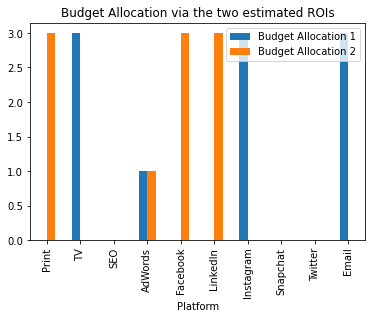

In [278]:
ROI_comp.plot(kind='bar',x='Platform',title="Budget Allocation via the two estimated ROIs")

#### 5)
Are the allocations the same?  Assuming the first ROI data is correct, if you were to use the 
second allocation (the allocation that assumed the second ROI data was correct) how much 
lower would the objective be relative to the optimal objective (the one that uses the first ROI 
data and the first allocation)?  Assuming the second ROI data is correct, if you used the first 
allocation how much lower would the objective be relative to the optimal objective?  Do you 
think the third constraint above, based on your boss’ experience, is useful? 

#### The allocations are not the same.

In [279]:
# First ROI data is correct
np.dot(ROI_2ModX.x,obj)

10.251999999999999

In [280]:
# Second ROI data is correct
np.dot(ROIModX.x,obj_2)

10.264

If the first ROI data is correct and the second allocation was used, the objective was lower than the optimal objective by 0.204 in millions of dollars . If the second ROI data is correctr and the first allocation is used, the objective was lower than the optimal objective by 0.192 in millions of dollars. We believe that it is useful because it helps mitigate the consequences of incorrectly choosing the most accurate ROI data. The maximum difference between the optimal solution and the feasible solutions found in the previous step is about 0.204 in millions of dollars. Although this difference isn't great, it'd be much worse if more of the budget was allocated to a platform based on one set of ROI data, but the actual ROI is much different e.g. investing all 10M in LinkedIn assuming ROI is 4.6% but its actually 2.4%. Seeing how the budget was allocated almost completely differently just based on different ROI data, there is evidence that the third constraint is useful to our boss.

**6)**

To explore this further perform some analysis of how your optimal allocation would change
based on changes in the ROI data. Use the first ROI data as your starting point. By how much
could each advertising medium’s ROI increase or decrease and still result in the same optimal
allocation you found in step (3)?

In [281]:
# Storing the platforms as a list
platforms=list(ROI_data.columns)[1:11]

In [282]:
#Range of ROI for each platform where optimal corner stays the same
lower_bound=ROIModX.SAObjLow 
upper_bound=ROIModX.SAObjUp

In [283]:
df_lower_upper_bounds=pd.DataFrame(list(zip(obj,lower_bound,upper_bound)),index =platforms,columns =['Objective Function Current Parameters','Lower Bound', 'Upper Bound'])
df_lower_upper_bounds

,Objective Function Current Parameters,Lower Bound,Upper Bound
Print,1.031,-inf,1.049
TV,1.049,1.039,1.062
SEO,1.024,-inf,1.039
AdWords,1.039,1.033,1.046
Facebook,1.016,-inf,1.029
LinkedIn,1.024,-inf,1.039
Instagram,1.046,1.039,inf
Snapchat,1.026,-inf,1.039
Twitter,1.033,-inf,1.039
Email,1.044,1.029,inf


The amount each advertising medium's ROI could increase or decrease and still result in the same optimal allocation is shown in the dataframe above. An 'inf' means thats the amount allocated to the medium is already at its maximum of 3M dollars and so increasing the ROI would have no effect since it is already maximized. But the mediums that had 3M invested in them do have a lower limit for ROI. An '-inf' means that there was no money allocated to the medium anyways so decreasing the ROI of those mediums to 0 would not have an effect on the allocation of the budget. But the mediums that had 3M invested in them do have an upper limit for ROI.

**7.**
Your boss has gained permission to reinvest half of the return. For example, if the marketing
obtains a 4% return in January, the budget of February will be $10M + $10M × 4% × 50% =
$10.2M. The monthly ROI for next year is given in Project1.Rdata. The three constraints given
by your boss are still in place for each month. What is the optimal allocation for each month?

In [284]:
# Reading the expected monthly ROI data for the different platforms from 'roi_mat.csv'
roi_by_month=pd.read_csv("roi_mat.csv",index_col='Unnamed: 0') 
# Updating values to actual returns
return_by_month=roi_by_month.apply(lambda x: (100+x)/100)
return_by_month

,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
January,1.040,1.036,1.024,1.039,1.030,1.035,1.036,1.0225,1.035,1.035
February,1.040,1.039,1.027,1.038,1.043,1.032,1.027,1.0180,1.037,1.035
March,1.035,1.029,1.031,1.038,1.024,1.041,1.037,1.0260,1.042,1.025
April,1.038,1.031,1.024,1.044,1.024,1.038,1.037,1.0250,1.036,1.029
May,1.035,1.032,1.019,1.034,1.027,1.027,1.039,1.0220,1.045,1.039
June,1.040,1.032,1.027,1.034,1.034,1.030,1.045,1.0210,1.038,1.041
July,1.039,1.036,1.020,1.044,1.039,1.037,1.043,1.0180,1.040,1.038
August,1.042,1.033,1.028,1.042,1.020,1.037,1.036,1.0150,1.044,1.043
September,1.041,1.028,1.025,1.042,1.029,1.037,1.028,1.0250,1.040,1.034
October,1.030,1.030,1.031,1.046,1.031,1.033,1.032,1.0230,1.025,1.032


In [285]:
# Storing the months as a list
month=list(roi_by_month.index.values)

In [295]:
#roi_by_month

In [287]:
 # Initializing a dictionary that stores month and corresponding optimal objective as key value pairs
obj_value_month={}
allocation_platform_month={}

# Initializing a data frame that stores optimal budget allocation across platforms for all the months 
allocation_platform_month_df=pd.DataFrame(index=month,columns=platforms)

In [288]:
budget=10 # Initial budget for January
# Looping to find the optimal allocation for all the months
for i in range(len(roi_by_month)):
    obj_month= np.array(return_by_month.iloc[i,:]) # objective vector
    A = np.zeros((13,10)) # initialize constraint matrix
    A[0,:] = [1,1,1,1,1,1,1,1,1,1] # budget constraint
    A[1,:] = [1,1,0,0,-1,0,0,0,0,-1] # print and TV constraint
    A[2,:] = [0,0,2,2,-1,-1,-1,-1,-1,0] # social media constraint
    A[3:13,:] = np.identity(10) # medium constraint
    
    # limits in M. Here the variable corresponding to the budget constraint (first) is kept variable 
    # as the budegt keeps changing every month
    b = np.array([budget,0,0,3,3,3,3,3,3,3,3,3,3])
    
    sense = np.array(['<','<','<','<','<','<','<','<','<','<','<','<','<']) # all constraints are less than or equal constraints
    ROI_model_monthly= gp.Model() # initialize an empty model

    ROI_model_monthlyModX = ROI_model_monthly.addMVar(10) # tell the model how many variables there are
    
    # add the constraints to the model
    ROI_model_monthlyModCon = ROI_model_monthly.addMConstrs(A, ROI_model_monthlyModX, sense, b)
    
    ROI_model_monthly.setMObjective(None,obj_month,0,sense=gp.GRB.MAXIMIZE) # adding the objective to the model
    ROI_model_monthly.Params.OutputFlag = 0 # tell gurobi to shut up!!
    ROI_model_monthly.Params.TimeLimit = 3600
    ROI_model_monthly.optimize() # Optmizing the objective function 
    obj_value_monthly=ROI_model_monthly.objVal # Storing the optimal objective for the month in loop
    allocation_platform_monthly=list(ROI_model_monthlyModX.x) # Storing the optimal allocation for the month in loop as a list
    allocation_platform_month_df.iloc[i]=allocation_platform_monthly # Adding the optimal allocation for the month in loop to df
    obj_value_month[month[i]]=obj_value_monthly # Adding the optimal objective for the month in loop to 'obj_value_month'
    return_monthly=(obj_value_monthly-budget)/budget # calculating monthly returns
    budget=budget+budget*return_monthly/2 # Updating budget by reinvesting half of the returns

In [289]:
allocation_platform_month_df # the optimal allocation for various platforms across months

,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
January,3.0,0.0,0.0,1.333333,0.0,0.0,2.666667,0.0,0.0,3.0
February,3.0,0.0,0.0,2.3955,3.0,0.0,0.0,0.0,1.791,0.0
March,0.0,0.0,0.0,3.0,0.0,3.0,1.389648,0.0,3.0,0.0
April,0.0,0.0,0.0,3.0,0.0,3.0,3.0,0.0,1.596856,0.0
May,1.8041,0.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0,3.0
June,3.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,2.020172,3.0
July,1.123777,0.0,0.0,3.0,1.123777,0.0,3.0,0.0,3.0,0.0
August,3.0,0.0,0.0,1.827294,0.0,0.654588,0.0,0.0,3.0,3.0
September,1.362933,0.0,0.0,3.0,0.0,3.0,0.0,0.0,3.0,1.362933
October,0.0,0.0,0.0,3.0,0.0,3.0,3.0,0.0,0.0,2.955475


In [296]:
obj_value_month

{'January': 10.373000000000001,
 'February': 10.592796,
 'March': 10.804064976,
 'April': 11.011343321567999,
 'May': 11.236243401451441,
 'June': 11.474938175936193,
 'July': 11.716209556193508,
 'August': 11.969848348460829,
 'September': 12.185085240357177,
 'October': 12.383050474650137,
 'November': 12.686638438510093,
 'December': 12.944784828665732}

**8)**

A stable budget is defined as a monthly allocation such that for each platform the monthly
change in spend is no more than $1M. Is the allocation you found stable? If it isn’t, you do not
need to solve a new optimization model. Describe how my might model this?

A stable budget is defined as a monthly allocation such that for each platform the monthly change in spend is no more than $1M. From our findings, we conclude that our allocation budget is not a stable budget as there are monthly allocation changes in spend of over 1M dollars.  One can model this by adding an additional constraint to which each marketing medium allocation change in spending is less than or equal to 1M dollar. 